In [8]:
import os
import cv2
import glob
import json

from torchvision.io import read_image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes

In [9]:
class_name_to_id = {'airplane': 0,
 'apple': 1,
 'backpack': 2,
 'banana': 3,
 'baseball bat': 4,
 'baseball glove': 5,
 'bear': 6,
 'bed': 7,
 'bench': 8,
 'bicycle': 9,
 'bird': 10,
 'boat': 11,
 'book': 12,
 'bottle': 13,
 'bowl': 14,
 'broccoli': 15,
 'bus': 16,
 'cake': 17,
 'car': 18,
 'carrot': 19,
 'cat': 20,
 'cell phone': 21,
 'chair': 22,
 'clock': 23,
 'couch': 24,
 'cow': 25,
 'cup': 26,
 'dining table': 27,
 'dog': 28,
 'donut': 29,
 'elephant': 30,
 'fire hydrant': 31,
 'fork': 32,
 'frisbee': 33,
 'giraffe': 34,
 'hair drier': 35,
 'handbag': 36,
 'horse': 37,
 'hot dog': 38,
 'keyboard': 39,
 'kite': 40,
 'knife': 41,
 'laptop': 42,
 'microwave': 43,
 'motorcycle': 44,
 'mouse': 45,
 'orange': 46,
 'oven': 47,
 'parking meter': 48,
 'person': 49,
 'pizza': 50,
 'potted plant': 51,
 'refrigerator': 52,
 'remote': 53,
 'sandwich': 54,
 'scissors': 55,
 'sheep': 56,
 'sink': 57,
 'skateboard': 58,
 'skis': 59,
 'snowboard': 60,
 'spoon': 61,
 'sports ball': 62,
 'stop sign': 63,
 'suitcase': 64,
 'surfboard': 65,
 'teddy bear': 66,
 'tennis racket': 67,
 'tie': 68,
 'toaster': 69,
 'toilet': 70,
 'toothbrush': 71,
 'traffic light': 72,
 'train': 73,
 'truck': 74,
 'tv': 75,
 'umbrella': 76,
 'vase': 77,
 'wine glass': 78,
 'zebra': 79}


In [10]:
coco_classification_path = "/home/hashmat/Downloads/Coco_2017/coco_classification"
coco_train_folder_path = os.path.join(coco_classification_path, "images", "train")
coco_val_folder_path = os.path.join(coco_classification_path, "images", "val")


In [11]:
images_per_class_train = {}
images_per_class_val = {}

In [22]:
folder_train = os.listdir(coco_train_folder_path)
folder_val = os.listdir(coco_val_folder_path)

for folder in folder_train:
    folder_path = os.path.join(coco_train_folder_path, folder)
    images = os.listdir(folder_path)
    class_name = folder_path.split("/")[-1]
    images_per_class_train[class_name_to_id[class_name]] = len(images)
    
for folder in folder_val:
    folder_path = os.path.join(coco_val_folder_path, folder)
    images = os.listdir(folder_path)
    class_name = folder_path.split("/")[-1]
    images_per_class_val[class_name_to_id[class_name]] = len(images)
    
    
print(images_per_class_train)
print(images_per_class_val)

print(sum(images_per_class_train.values()))
print(sum(images_per_class_val.values()))


{12: 190, 10: 1298, 56: 737, 0: 2434, 49: 27319, 19: 137, 48: 274, 16: 2526, 41: 60, 11: 1454, 46: 254, 44: 1429, 76: 806, 38: 314, 5: 19, 67: 26, 61: 30, 52: 1294, 72: 831, 40: 679, 59: 5, 36: 112, 58: 81, 18: 1669, 3: 505, 32: 20, 29: 303, 55: 210, 1: 214, 79: 1222, 30: 1537, 35: 8, 75: 1174, 65: 378, 27: 5386, 31: 896, 15: 576, 28: 1498, 53: 113, 63: 922, 54: 647, 73: 2840, 66: 703, 71: 56, 42: 869, 60: 102, 78: 62, 7: 2331, 43: 264, 64: 666, 70: 2356, 34: 1739, 25: 1099, 57: 1389, 45: 24, 9: 462, 33: 48, 13: 180, 51: 756, 24: 1434, 2: 97, 74: 2142, 4: 14, 77: 670, 39: 248, 8: 1324, 37: 1562, 69: 27, 62: 12, 50: 1169, 23: 1896, 22: 1053, 6: 850, 26: 275, 47: 1090, 68: 44, 14: 1000, 20: 1520, 21: 247, 17: 700}
{12: 8, 10: 46, 56: 27, 0: 77, 49: 1089, 19: 8, 48: 23, 16: 116, 41: 1, 11: 65, 46: 13, 44: 54, 76: 43, 38: 11, 5: 1, 67: 2, 52: 53, 72: 43, 40: 32, 58: 5, 18: 67, 3: 26, 32: 5, 29: 15, 55: 8, 1: 8, 79: 56, 30: 53, 35: 2, 75: 73, 65: 16, 27: 208, 31: 45, 15: 20, 28: 57, 53: 2, 

In [24]:
for k, v in images_per_class_train.items():
    print(f"Training images in Class {k}: {v}")

Training images in Class 12: 190
Training images in Class 10: 1298
Training images in Class 56: 737
Training images in Class 0: 2434
Training images in Class 49: 27319
Training images in Class 19: 137
Training images in Class 48: 274
Training images in Class 16: 2526
Training images in Class 41: 60
Training images in Class 11: 1454
Training images in Class 46: 254
Training images in Class 44: 1429
Training images in Class 76: 806
Training images in Class 38: 314
Training images in Class 5: 19
Training images in Class 67: 26
Training images in Class 61: 30
Training images in Class 52: 1294
Training images in Class 72: 831
Training images in Class 40: 679
Training images in Class 59: 5
Training images in Class 36: 112
Training images in Class 58: 81
Training images in Class 18: 1669
Training images in Class 3: 505
Training images in Class 32: 20
Training images in Class 29: 303
Training images in Class 55: 210
Training images in Class 1: 214
Training images in Class 79: 1222
Training ima

In [25]:
for k, v in images_per_class_val.items():
    print(f"Val images in Class {k}: {v}")

Val images in Class 12: 8
Val images in Class 10: 46
Val images in Class 56: 27
Val images in Class 0: 77
Val images in Class 49: 1089
Val images in Class 19: 8
Val images in Class 48: 23
Val images in Class 16: 116
Val images in Class 41: 1
Val images in Class 11: 65
Val images in Class 46: 13
Val images in Class 44: 54
Val images in Class 76: 43
Val images in Class 38: 11
Val images in Class 5: 1
Val images in Class 67: 2
Val images in Class 52: 53
Val images in Class 72: 43
Val images in Class 40: 32
Val images in Class 58: 5
Val images in Class 18: 67
Val images in Class 3: 26
Val images in Class 32: 5
Val images in Class 29: 15
Val images in Class 55: 8
Val images in Class 1: 8
Val images in Class 79: 56
Val images in Class 30: 53
Val images in Class 35: 2
Val images in Class 75: 73
Val images in Class 65: 16
Val images in Class 27: 208
Val images in Class 31: 45
Val images in Class 15: 20
Val images in Class 28: 57
Val images in Class 53: 2
Val images in Class 63: 37
Val images i

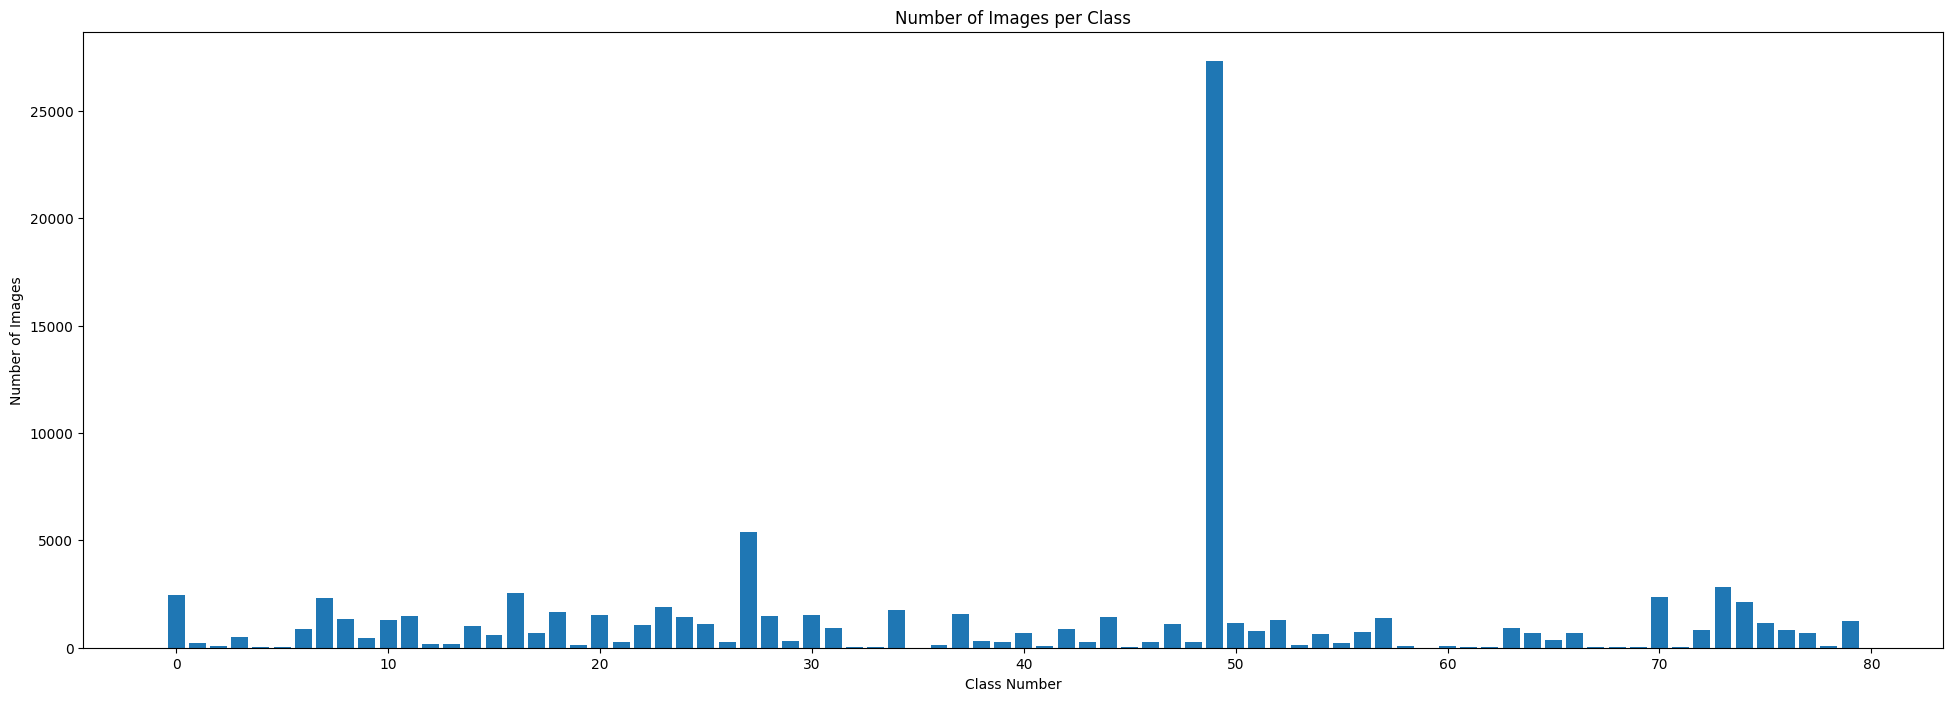

In [19]:
import matplotlib.pyplot as plt



# separate keys and values into two lists
classes = list(images_per_class_train.keys())
num_images = list(images_per_class_train.values())


plt.figure(figsize=(24, 8))  
# create a bar plot
plt.bar(classes, num_images)
plt.xlabel('Class Number')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.show()

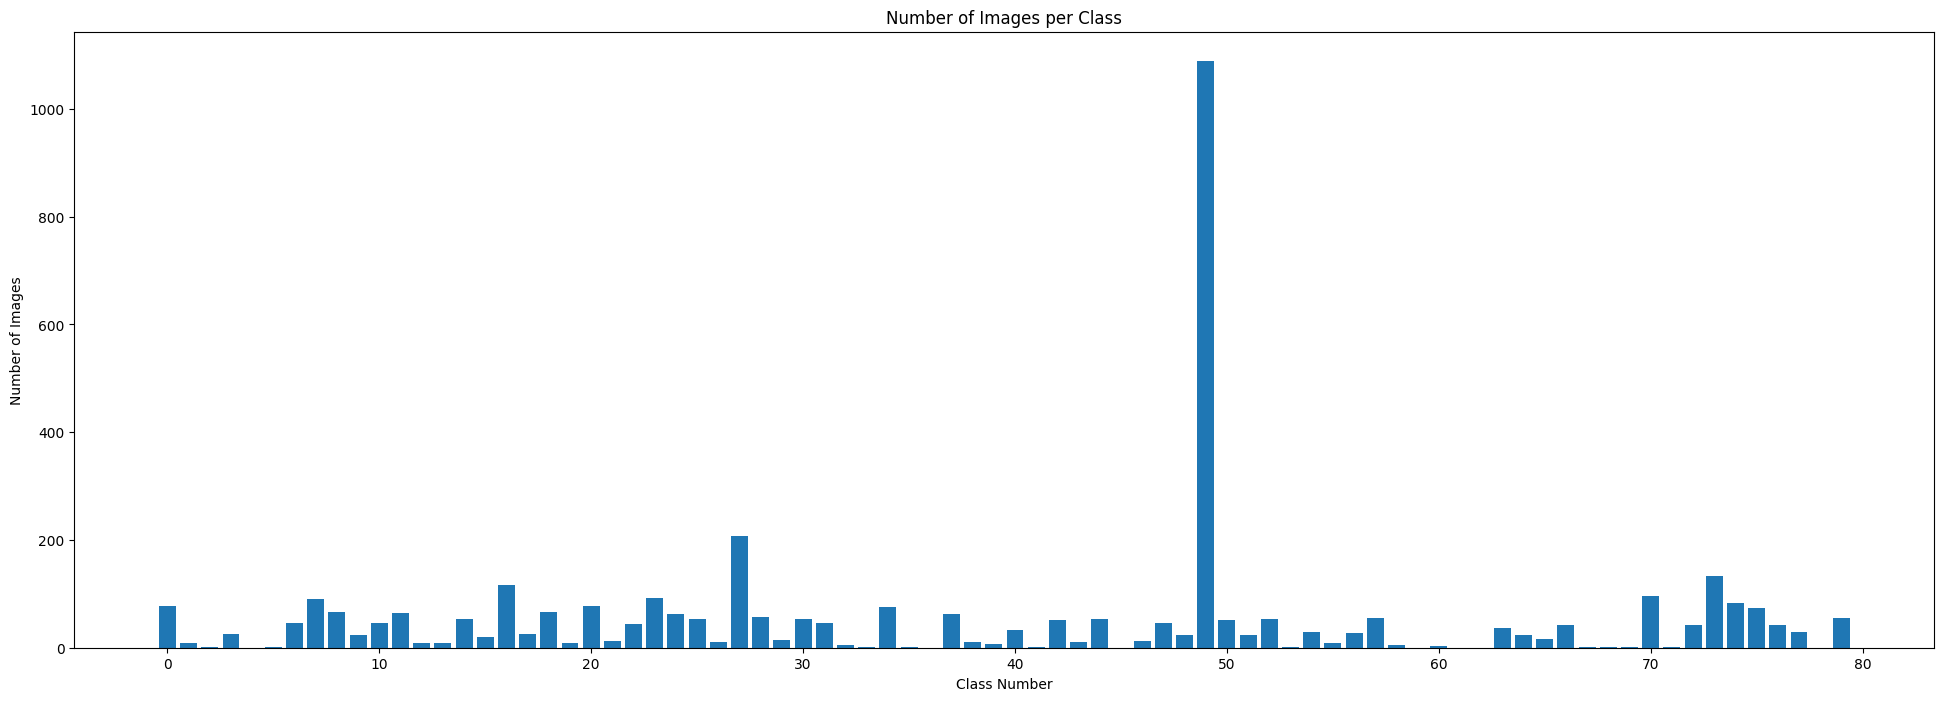

In [20]:
import matplotlib.pyplot as plt



# separate keys and values into two lists
classes = list(images_per_class_val.keys())
num_images = list(images_per_class_val.values())


plt.figure(figsize=(24, 8))  
# create a bar plot
plt.bar(classes, num_images)
plt.xlabel('Class Number')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.show()

In [18]:
classes

[12,
 10,
 56,
 0,
 49,
 19,
 48,
 16,
 41,
 11,
 46,
 44,
 76,
 38,
 5,
 67,
 52,
 72,
 40,
 58,
 18,
 3,
 32,
 29,
 55,
 1,
 79,
 30,
 35,
 75,
 65,
 27,
 31,
 15,
 28,
 53,
 63,
 54,
 73,
 66,
 71,
 42,
 60,
 7,
 43,
 64,
 70,
 34,
 25,
 57,
 9,
 33,
 13,
 51,
 24,
 2,
 74,
 77,
 39,
 8,
 37,
 69,
 50,
 23,
 22,
 6,
 26,
 47,
 68,
 14,
 20,
 21,
 17]